Ranking Distribution of User's Listened Songs:
count      770.000000
mean     18851.592208
std      26144.909384
min          1.000000
25%       2282.750000
50%       7702.500000
75%      19417.500000
max      89661.000000
Name: rank, dtype: float64


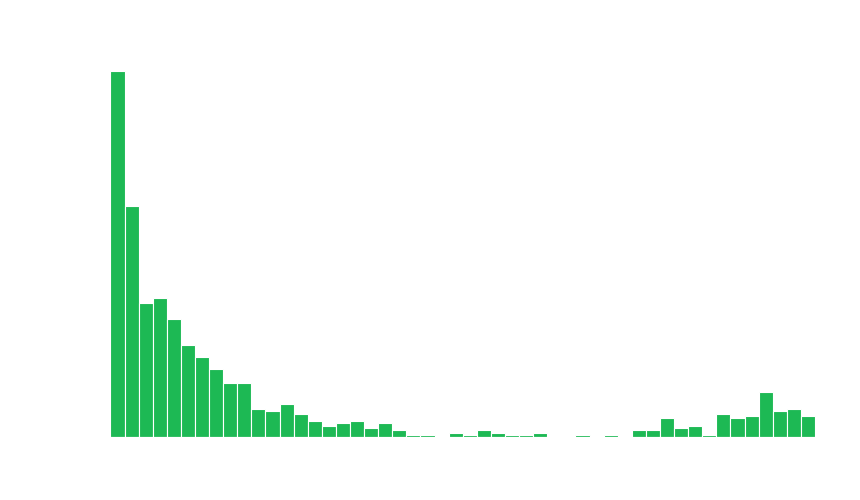


=== Top 20 Recommendations Analysis ===
Number of listened songs in top 20: 8
Percentage: 40.0%

Listened Songs Details:
                     track_id                         track_name  \
10280  3facltffvuuqynesptbk8w                      Back To Black   
34252  5fvd6kxrgo9b3jpmc8opst                   Do I Wanna Know?   
81007  7eqoqgkkwgoawnnhx90uez                             Nights   
2052   70lcf31zb1h0pyjos1sx1r                              Creep   
41829  7o2cth4ctstm8tnelqjb51                Sweet Child O' Mine   
2654   20i8rduzc2pwmwtdczuuan                        Take Me Out   
67867  3huxzqpsfddqwm3ztfqy0k                             august   
84083  4rvwpyq5rl0ao9lpzesoue  Everybody Wants To Rule The World   

                artist  rank  play_count       last_play_time  
10280    Amy Winehouse     1         5.0  2024-05-25 04:54:41  
34252   Arctic Monkeys     2         1.0  2024-05-19 05:03:14  
81007      Frank Ocean     6        13.0  2024-07-05 15:49:16  
2052     

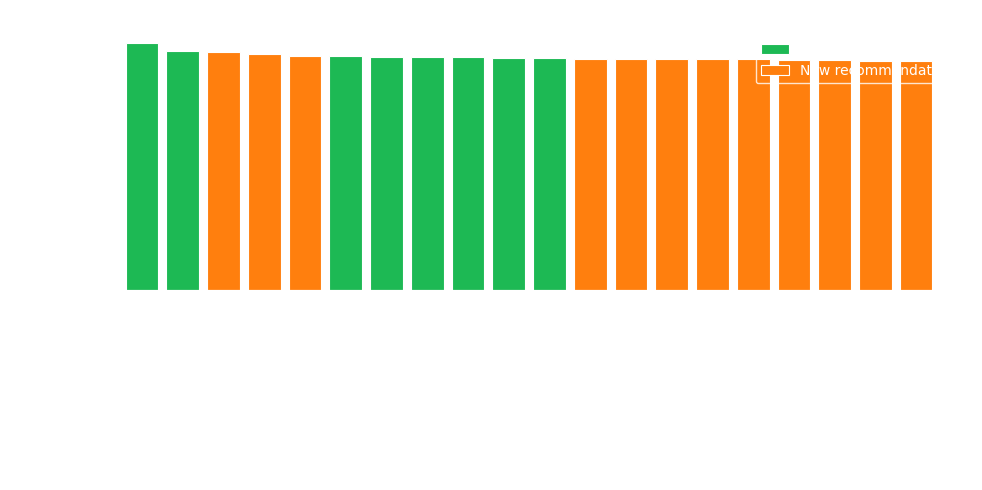

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load user's listened songs list
user_df = pd.read_csv("user_features_final_cleaned.csv")
# Standardize track_id format (string, stripped, lowercase)
user_df['track_id'] = user_df['track_id'].astype(str).str.strip().str.lower()
# Create set of listened track IDs for fast lookup
listened_set = set(user_df['track_id'])

# 2. Load recommendation results and sort by score
scores_df = pd.read_csv("all_item_similarity_scores.csv")  
# Standardize track_id format to match user data
scores_df['track_id'] = scores_df['track_id'].astype(str).str.strip().str.lower()
# Calculate ranking based on similarity scores (descending)
scores_df['rank'] = scores_df['score'].rank(ascending=False, method='first').astype(int)

# 3. Mark which songs the user has listened to
scores_df['is_listened'] = scores_df['track_id'].isin(listened_set)
user_subset = user_df[['track_id', 'play_count', 'last_play_time']].drop_duplicates()
scores_df = scores_df.merge(user_subset, on='track_id', how='left')

# 4. Analyze ranking distribution of listened songs
listened_ranks = scores_df[scores_df['is_listened']]['rank']
print("Ranking Distribution of User's Listened Songs:")
print(listened_ranks.describe())  

# 5. Visualize the ranking distribution
plt.figure(figsize=(10, 5))
plt.hist(listened_ranks, 
         bins=50, 
         color='#1DB954',  
         edgecolor='white',
         linewidth=0.8  
         )  

title = plt.title("Ranking Distribution of User's Previously Listened Songs", 
                 fontsize=14, 
                 fontweight='bold',
                 pad=20,
                 color='white')
xlabel = plt.xlabel("Recommendation Ranking (score-based)", 
                  fontsize=12,
                  labelpad=10,
                  color='white')
ylabel = plt.ylabel("Number of Songs", 
                  fontsize=12,
                  labelpad=10,
                  color='white')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(axis='both', colors='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.savefig('ranking_distribution_white_theme.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True,
            facecolor='none',
            edgecolor='none')
plt.show()


# 6. Analyze how many listened songs appear in top 20 recommendations
top_20_recommendations = scores_df.sort_values('score', ascending=False).head(20)
listened_in_top20 = top_20_recommendations['is_listened'].sum()

print(f"\n=== Top 20 Recommendations Analysis ===")
print(f"Number of listened songs in top 20: {listened_in_top20}")
print(f"Percentage: {listened_in_top20/20 * 100:.1f}%")

# 7. Show details of listened songs in top recommendations
if listened_in_top20 > 0:
    print("\nListened Songs Details:")
    print(top_20_recommendations[top_20_recommendations['is_listened']]
          [['track_id', 'track_name','artist', 'rank','play_count', 'last_play_time']])

# 8. Visualize top 20 recommendations with color coding
plt.figure(figsize=(10, 5))
bars = plt.bar(
    top_20_recommendations['track_name'].str[:20] + " - " +
    top_20_recommendations['artist'].str[:15],
    top_20_recommendations['score'],
    color=['#1DB954' if x else '#ff7f0e' for x in top_20_recommendations['is_listened']],
    edgecolor='white',   
    linewidth=0.8
)

blue_bar = next(bar for bar, is_listened in zip(bars, top_20_recommendations['is_listened']) if is_listened)
orange_bar = next(bar for bar, is_listened in zip(bars, top_20_recommendations['is_listened']) if not is_listened)
legend = plt.legend(
    [blue_bar, orange_bar],
    ['Listened songs', 'New recommendations'],
    loc='upper right',
    facecolor='none', 
    edgecolor='white'    
)
plt.setp(legend.get_texts(), color='white') 
plt.title("Top 20 Recommendations", fontsize=12, color='white')
plt.xlabel("Song - Artist", fontsize=10, color='white')
plt.ylabel("Recommendation Score", fontsize=10, color='white')
plt.xticks(rotation=45, ha='right', fontsize=8, color='white')
plt.yticks(fontsize=8, color='white')


ax = plt.gca()
for spine in ax.spines.values():
    spine.set_color('white')
ax.tick_params(colors='white')
ax.yaxis.label.set_color('white')
ax.xaxis.label.set_color('white')


plt.grid(False)
plt.tight_layout()
plt.gcf().patch.set_alpha(0)   
ax.set_facecolor('none')       
plt.savefig("top_20_recommendations_white.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()



=== Recommendation Performance Evaluation ===
+---------+----------+-------------+-------------+
|  Top K  |  Recall  |  Precision  |  Hit Songs  |
+---------+----------+-------------+-------------+
|    20.0 |   1.04% |     40.00% |         8.0 |
|    50.0 |   1.95% |     30.00% |        15.0 |
|   100.0 |   2.99% |     23.00% |        23.0 |
+---------+----------+-------------+-------------+


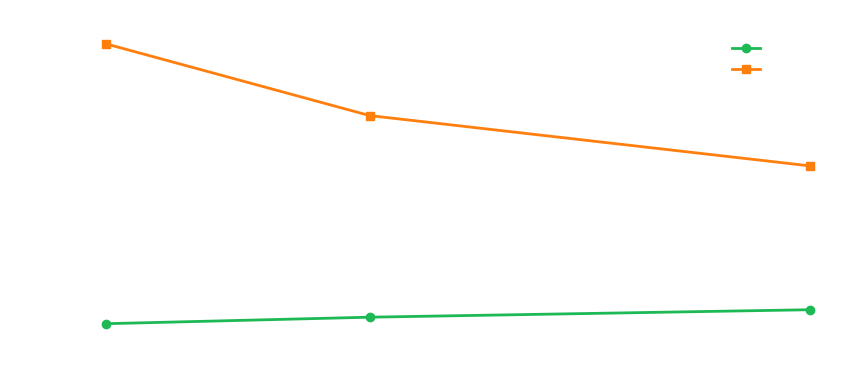

In [2]:
# 9. Define evaluation function
def evaluate_recommendations(recommendations, listened_songs, K_values=[20, 50, 100]):
    """
    Calculate recall and precision at different K values
    
    Args:
        recommendations: DataFrame with 'score' and 'is_listened' columns
        listened_songs: Set of track_ids the user has listened to
        K_values: List of cutoff positions to evaluate (default: [20, 50, 100])
    
    Returns:
        DataFrame with evaluation metrics for each K value
    """
    results = []
    total_listened = len(listened_songs)
    
    for K in K_values:
        # Get top K recommendations sorted by score
        top_K = recommendations.sort_values('score', ascending=False).head(K)
        
        # Count how many in top K were actually listened by user
        hit_count = top_K['is_listened'].sum()
        
        # Calculate metrics
        recall = hit_count / total_listened if total_listened > 0 else 0
        precision = hit_count / K
        
        results.append({
            'K': K,                      # Cutoff position
            'Recall': recall,            # Percentage of listened songs found
            'Precision': precision,      # Percentage of top K that are relevant
            'Hit_Songs': hit_count,      # Absolute number of correct hits
            'Total_Listened': total_listened  # Total listened songs in dataset
        })
    
    return pd.DataFrame(results)

# Run evaluation
metrics_df = evaluate_recommendations(scores_df, listened_set)

def print_metrics_table(metrics_df):
    """
    Print formatted evaluation results in ASCII table format
    
    Args:
        metrics_df: DataFrame from evaluate_recommendations()
    """
    print("\n=== Recommendation Performance Evaluation ===")
    print("+---------+----------+-------------+-------------+")
    print("|  Top K  |  Recall  |  Precision  |  Hit Songs  |")
    print("+---------+----------+-------------+-------------+")
    
    for _, row in metrics_df.iterrows():
        print("| {:>7} | {:>7.2%} | {:>10.2%} | {:>11} |".format(
            row['K'], row['Recall'], row['Precision'], row['Hit_Songs']))
    
    print("+---------+----------+-------------+-------------+")

# Display formatted results
print_metrics_table(metrics_df)

# Visualization of metrics
plt.figure(figsize=(10, 4), facecolor='none')

plt.plot(metrics_df['K'], metrics_df['Recall'], 
         marker='o', label='Recall', linewidth=2, color='#1DB954')
plt.plot(metrics_df['K'], metrics_df['Precision'], 
         marker='s', label='Precision', linewidth=2, color='#ff7f0e')  


plt.title("Recommendation Performance at Different K Values", 
          color='white', fontsize=12, fontweight='bold')
plt.xlabel("Top K Recommendations", color='white', fontsize=10)
plt.ylabel("Score Value", color='white', fontsize=10)


legend = plt.legend(loc='best', facecolor='none', edgecolor='white')
plt.setp(legend.get_texts(), color='white')


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')


ax.tick_params(axis='both', colors='white')
plt.xticks(color='white')
plt.yticks(color='white')


plt.grid(True, linestyle='--', alpha=0.3, color='white')
plt.savefig('recommendation_performance_green.png', 
            dpi=300, 
            bbox_inches='tight', 
            transparent=True,
            facecolor='none',
            edgecolor='none')

plt.show()